In [1]:
import pandas_datareader as pdr
key="8cb6746738995d5aac11b85aec8fee36a9e71e2c"
df = pdr.get_data_tiingo("btcusd", api_key=key, start='2018-01-01', )

/Users/Hb.Z/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [2]:
df.to_csv('btcusd.csv')

In [3]:
import pandas as pd
df=pd.read_csv('btcusd.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,btcusd,2018-01-02 00:00:00+00:00,13443.41,15407.865697,12801.380000,13380.290096,47749.207589,13443.41,15407.865697,12801.380000,13380.290096,47749.207589,0.0,1.0
1,btcusd,2018-01-03 00:00:00+00:00,14678.94,15376.914302,12910.580000,14701.852399,49533.842730,14678.94,15376.914302,12910.580000,14701.852399,49533.842730,0.0,1.0
2,btcusd,2018-01-04 00:00:00+00:00,15155.62,15500.000000,13986.879873,15011.739857,54304.123820,15155.62,15500.000000,13986.879873,15011.739857,54304.123820,0.0,1.0
3,btcusd,2018-01-05 00:00:00+00:00,15143.67,17147.551635,14192.370000,15112.908133,59753.020000,15143.67,17147.551635,14192.370000,15112.908133,59753.020000,0.0,1.0
4,btcusd,2018-01-06 00:00:00+00:00,16928.00,17200.000000,14810.000000,16939.847999,48081.910000,16928.00,17200.000000,14810.000000,16939.847999,48081.910000,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1447,btcusd,2021-12-19 00:00:00+00:00,46685.762471,48142.136662,46417.661037,46843.859240,42149.065648,46685.762471,48142.136662,46417.661037,46843.859240,42149.065648,0.0,1.0
1448,btcusd,2021-12-20 00:00:00+00:00,46915.436118,47481.227467,45566.279451,46684.452472,54369.005705,46915.436118,47481.227467,45566.279451,46684.452472,54369.005705,0.0,1.0
1449,btcusd,2021-12-21 00:00:00+00:00,48900.719221,49334.558442,46640.411527,46917.390151,55463.349568,48900.719221,49334.558442,46640.411527,46917.390151,55463.349568,0.0,1.0
1450,btcusd,2021-12-22 00:00:00+00:00,48598.359546,49584.353211,48438.610406,48905.848336,38081.417402,48598.359546,49584.353211,48438.610406,48905.848336,38081.417402,0.0,1.0
1451,btcusd,2021-12-23 00:00:00+00:00,48321.325780,48735.619836,47945.248376,48597.608187,6718.512368,48321.325780,48735.619836,47945.248376,48597.608187,6718.512368,0.0,1.0


In [5]:
df1=df.reset_index()['close']

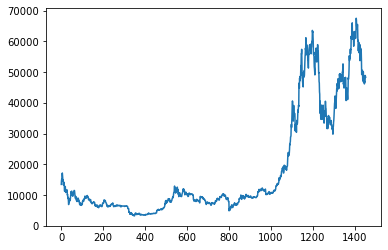

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
df1
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.15949401],
       [0.17869336],
       [0.18610066],
       ...,
       [0.71047804],
       [0.70577956],
       [0.70147463]])

In [9]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(943, 509)

In [11]:
train_data

array([[0.15949401],
       [0.17869336],
       [0.18610066],
       [0.18591497],
       [0.21364232],
       [0.21708693],
       [0.20114898],
       [0.18368227],
       [0.17441335],
       [0.18197341],
       [0.15639266],
       [0.16474632],
       [0.17121644],
       [0.16267305],
       [0.16203672],
       [0.12752845],
       [0.12449843],
       [0.12537205],
       [0.1301027 ],
       [0.14912273],
       [0.13020946],
       [0.1185568 ],
       [0.11922235],
       [0.12775564],
       [0.12394197],
       [0.12296936],
       [0.12846392],
       [0.13217845],
       [0.12405198],
       [0.10553497],
       [0.10830097],
       [0.09043055],
       [0.08794177],
       [0.09395597],
       [0.0778749 ],
       [0.05741375],
       [0.07082578],
       [0.06850482],
       [0.07894339],
       [0.08569089],
       [0.08360893],
       [0.07594802],
       [0.08887677],
       [0.08303381],
       [0.09807576],
       [0.10626532],
       [0.10903133],
       [0.123

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(842, 100)
(842,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(408, 100)
(408,)


(None, None)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2021-12-23 04:23:40.793693: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2021-12-23 04:23:41.674894: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


14/14 [==============================] - 5s 166ms/step - loss: 0.0014 - val_loss: 0.1497
Epoch 2/100
14/14 [==============================] - 1s 95ms/step - loss: 4.0988e-04 - val_loss: 0.0146
Epoch 3/100
14/14 [==============================] - 1s 95ms/step - loss: 1.9840e-04 - val_loss: 0.0139
Epoch 4/100
14/14 [==============================] - 1s 98ms/step - loss: 1.6480e-04 - val_loss: 0.0131
Epoch 5/100
14/14 [==============================] - 1s 94ms/step - loss: 1.5459e-04 - val_loss: 0.0145
Epoch 6/100
14/14 [==============================] - 1s 103ms/step - loss: 1.5211e-04 - val_loss: 0.0101
Epoch 7/100
14/14 [==============================] - 1s 100ms/step - loss: 1.4176e-04 - val_loss: 0.0130
Epoch 8/100
14/14 [==============================] - 1s 95ms/step - loss: 1.2711e-04 - val_loss: 0.0114
Epoch 9/100
14/14 [==============================] - 1s 97ms/step - loss: 1.2001e-04 - val_loss: 0.0142
Epoch 10/100
14/14 [==============================] - 1s 100ms/step - loss: 1

In [21]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7779.09881373873

In [24]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

35580.30218706596

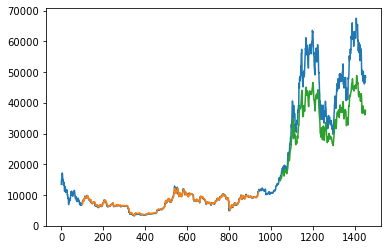

In [25]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()